In [10]:
import pandas as pd
import sqlalchemy

In [11]:
engine = sqlalchemy.create_engine('sqlite:///'+'BUSDquote.db')
df = pd.read_sql('select Symbol, Time, Close from crypto_price', engine)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119214 entries, 0 to 119213
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Symbol  119214 non-null  object 
 1   Time    119214 non-null  object 
 2   Close   119214 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.7+ MB


<AxesSubplot:>

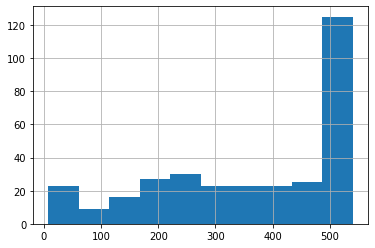

In [13]:
# The distribution of asset number for each asset
df.groupby('Symbol')['Close'].count().hist()

Most asset data are recorded for whole observed period.

<AxesSubplot:>

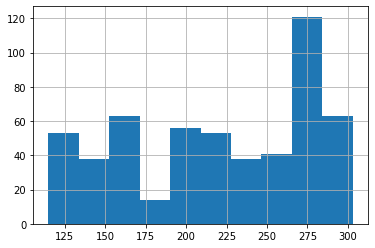

In [14]:
# The distribution of asset number for each timestamp
df.groupby('Time')['Close'].count().hist()

# Data wrangling

The number of assets recorded in a day vary in this obersavtion period.

In [15]:
def pickFullperiod(df):
    df_symbolnumber = df.groupby('Symbol')['Close'].count()
    full_period = df_symbolnumber.max()
    period_symbol_dict = dict(df_symbolnumber)
    return df[df['Symbol'].map(period_symbol_dict) == full_period]
    

In [16]:
df_full_period = pickFullperiod(df)

In [17]:
df_full_period.groupby('Symbol')['Close'].mean().nlargest(10)

Symbol
BTCBUSD     44177.391519
YFIBUSD     30503.998537
ETHBUSD      2728.449093
MKRBUSD      2426.074815
BCHBUSD       502.480130
KP3RBUSD      419.695444
BNBBUSD       377.449281
COMPBUSD      298.608907
AAVEBUSD      267.709094
KSMBUSD       254.061313
Name: Close, dtype: float64

<AxesSubplot:>

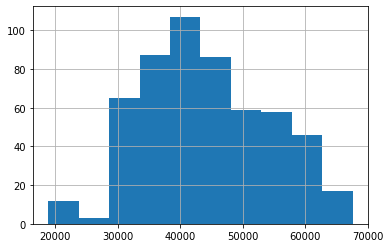

In [18]:
df_full_period.query('Symbol == "BTCBUSD"')['Close'].hist()

The BTC price is appeared around 40000 BUSD the most.

In [19]:
df_full_period[df_full_period['Symbol'].isin(['BTCBUSD'])]

,Symbol,Time,Close
540,BTCBUSD,2021-01-01 00:00:00.000000,29406.54
541,BTCBUSD,2021-01-02 00:00:00.000000,32215.48
542,BTCBUSD,2021-01-03 00:00:00.000000,33071.12
543,BTCBUSD,2021-01-04 00:00:00.000000,32015.40
544,BTCBUSD,2021-01-05 00:00:00.000000,34048.81
...,...,...,...
1075,BTCBUSD,2022-06-20 00:00:00.000000,20548.97
1076,BTCBUSD,2022-06-21 00:00:00.000000,20702.37
1077,BTCBUSD,2022-06-22 00:00:00.000000,19966.73
1078,BTCBUSD,2022-06-23 00:00:00.000000,21090.01


In [21]:
def pivoting(df):
    return df.pivot(index='Time', columns='Symbol')['Close']

In [22]:
df_clean = pivoting(df_full_period)
df_clean

Symbol,AAVEBUSD,ADABUSD,AERGOBUSD,ALGOBUSD,ALPHABUSD,ANTBUSD,ATOMBUSD,AUDBUSD,AUDIOBUSD,AVABUSD,...,WRXBUSD,XLMBUSD,XMRBUSD,XRPBUSD,XTZBUSD,XVSBUSD,YFIBUSD,ZECBUSD,ZILBUSD,ZRXBUSD
Time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00.000000,91.000,0.17555,0.04226,0.3995,0.21819,3.2251,5.880,0.76491,0.16003,0.8038,...,0.06660,0.13258,136.00,0.23808,2.0106,3.630,21932.61,56.73,0.07905,0.3746
2021-01-02 00:00:00.000000,85.803,0.17764,0.06000,0.4075,0.23602,3.1097,5.422,0.76522,0.15793,0.7664,...,0.06524,0.12750,143.32,0.22094,2.0008,3.680,21526.46,57.44,0.07218,0.3610
2021-01-03 00:00:00.000000,93.897,0.20663,0.05255,0.4257,0.28806,3.0606,5.843,0.76953,0.16111,0.7584,...,0.06666,0.13692,138.45,0.22573,2.1355,3.500,23852.83,59.30,0.06758,0.3915
2021-01-04 00:00:00.000000,113.938,0.22535,0.04687,0.4464,0.25729,3.3409,6.060,0.76168,0.15215,0.8193,...,0.06948,0.16397,133.90,0.23575,2.3309,3.601,23400.00,60.39,0.07011,0.3924
2021-01-05 00:00:00.000000,119.731,0.25917,0.04784,0.4815,0.28579,3.3014,6.222,0.77387,0.15603,0.8984,...,0.06998,0.19333,136.38,0.22639,2.3821,3.630,23819.10,59.84,0.07034,0.4474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-20 00:00:00.000000,61.500,0.49110,0.11170,0.3188,0.11540,1.6020,6.800,0.69750,0.31200,0.5410,...,0.19200,0.11290,117.20,0.32230,1.4420,5.060,4928.82,65.00,0.03448,0.2757
2022-06-21 00:00:00.000000,66.300,0.48070,0.11560,0.3255,0.11650,1.6620,6.940,0.69620,0.32200,0.5480,...,0.21600,0.11440,118.70,0.32900,1.4240,4.810,5119.81,65.70,0.04207,0.2785
2022-06-22 00:00:00.000000,61.800,0.45880,0.11380,0.3131,0.10950,1.6610,7.040,0.69050,0.33800,0.5220,...,0.21100,0.11280,111.00,0.32210,1.3430,4.850,4983.70,63.10,0.03864,0.2701


In [23]:
df_clean.index = pd.to_datetime(df_clean.index)

# Data analysis

In [61]:
# Anaylzing correlation between assets
retdaily = df_clean.pct_change()
corr_fullperiod = retdaily.corr()
corr_fullperiod

Symbol,AAVEBUSD,ADABUSD,AERGOBUSD,ALGOBUSD,ALPHABUSD,ANTBUSD,ATOMBUSD,AUDBUSD,AUDIOBUSD,AVABUSD,...,WRXBUSD,XLMBUSD,XMRBUSD,XRPBUSD,XTZBUSD,XVSBUSD,YFIBUSD,ZECBUSD,ZILBUSD,ZRXBUSD
Symbol,,,,,,,,,,,,,,,,,,,,,
AAVEBUSD,1.000000,0.592088,0.431103,0.580670,0.665927,0.511559,0.598374,0.275352,0.451733,0.540703,...,0.448599,0.529375,0.547554,0.535069,0.604279,0.542304,0.651213,0.589598,0.515617,0.645143
ADABUSD,0.592088,1.000000,0.381574,0.590511,0.551428,0.473683,0.604807,0.294886,0.408585,0.535336,...,0.415311,0.723344,0.557767,0.520934,0.614799,0.447397,0.531030,0.570741,0.529597,0.574868
AERGOBUSD,0.431103,0.381574,1.000000,0.461372,0.403808,0.379801,0.425397,0.161297,0.358916,0.451243,...,0.354354,0.389474,0.427564,0.364325,0.473233,0.391587,0.407322,0.444202,0.430621,0.480240
ALGOBUSD,0.580670,0.590511,0.461372,1.000000,0.554833,0.517945,0.645396,0.249800,0.418656,0.526868,...,0.387672,0.603507,0.558190,0.526668,0.675276,0.459164,0.569514,0.583484,0.523871,0.606455
ALPHABUSD,0.665927,0.551428,0.403808,0.554833,1.000000,0.444897,0.527009,0.203375,0.412249,0.486605,...,0.414757,0.498345,0.477593,0.515940,0.563276,0.521914,0.600236,0.554303,0.504070,0.592884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XVSBUSD,0.542304,0.447397,0.391587,0.459164,0.521914,0.399922,0.452747,0.217848,0.352781,0.494214,...,0.399428,0.428302,0.454627,0.440718,0.476122,1.000000,0.475287,0.480780,0.439077,0.501720
YFIBUSD,0.651213,0.531030,0.407322,0.569514,0.600236,0.450128,0.566914,0.199989,0.416320,0.509540,...,0.476818,0.562536,0.533256,0.565387,0.588905,0.475287,1.000000,0.615933,0.518962,0.555303
ZECBUSD,0.589598,0.570741,0.444202,0.583484,0.554303,0.482975,0.574576,0.235002,0.403044,0.537105,...,0.470354,0.604907,0.738302,0.536324,0.620393,0.480780,0.615933,1.000000,0.578630,0.592503


Take a overview of correlation between each asset

In [25]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(20,20)})

<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

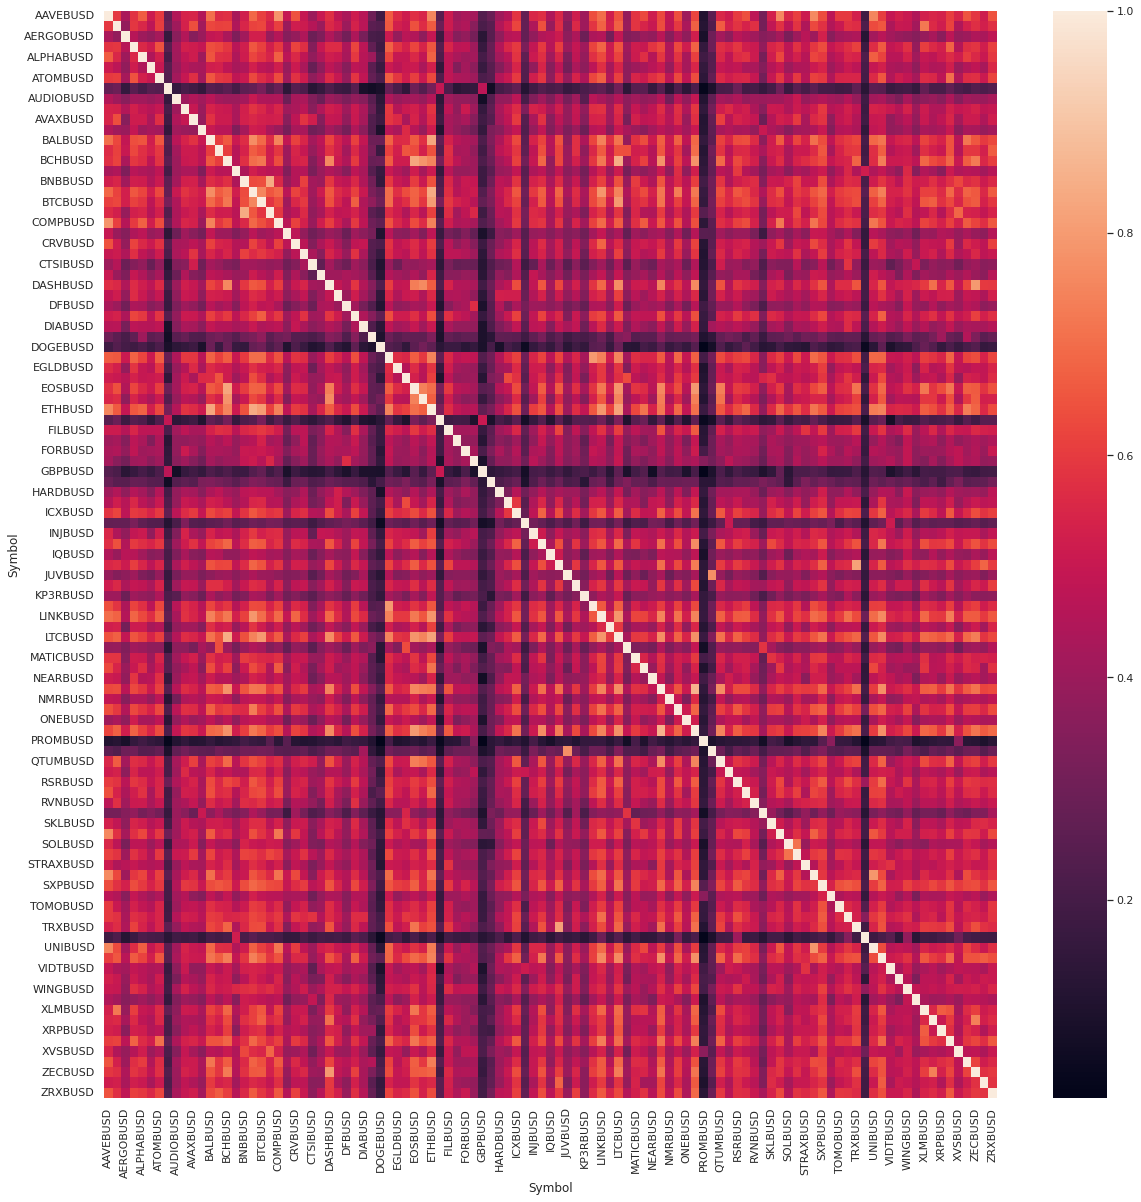

In [26]:
sns.heatmap(df_clean.pct_change().corr())

Looks like there are assets(tokens) with low correlation to others

Let's see how BTC/ETH perform in this high correlation value.

In [27]:
import matplotlib.pyplot as plt

plt.style.use('classic')
plt.rcParams["figure.figsize"] = (15, 6)

Text(0, 0.5, 'Return')

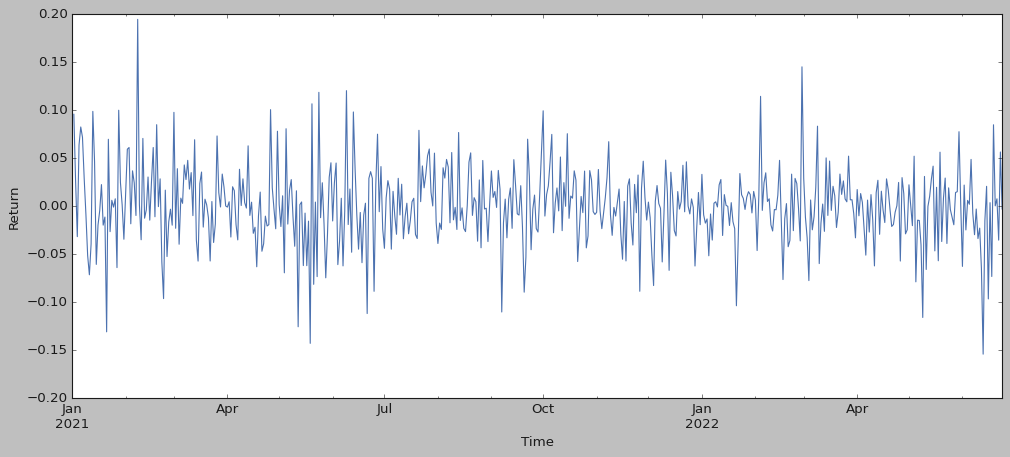

In [66]:
retdaily['BTCBUSD'].plot()
plt.ylabel('Return')

In [29]:
corr_fullperiod['BTCBUSD'].nlargest(10)

Symbol
BTCBUSD     1.000000
ETHBUSD     0.804790
LTCBUSD     0.795973
BNTBUSD     0.753234
BCHBUSD     0.718978
NEOBUSD     0.710358
LINKBUSD    0.699889
DOTBUSD     0.698477
BALBUSD     0.692900
VETBUSD     0.681995
Name: BTCBUSD, dtype: float64

Text(0, 0.5, 'Return')

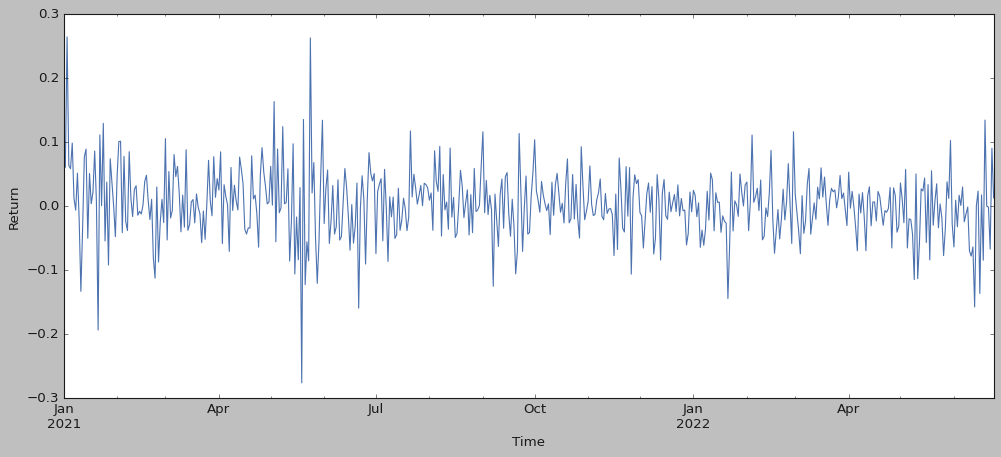

In [67]:
retdaily['ETHBUSD'].plot()
plt.ylabel('Return')

Text(0.5, 1.0, 'Scatter plot of BTC/ETH return')

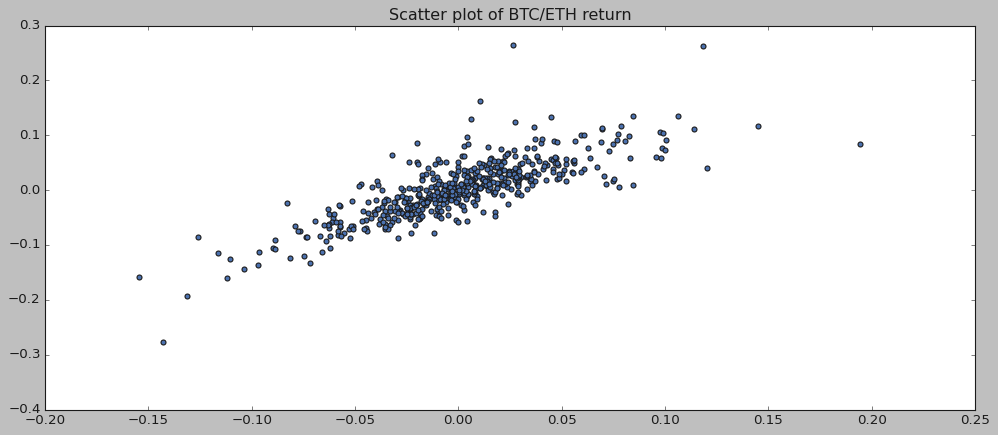

In [65]:
plt.scatter(retdaily['BTCBUSD'], retdaily['ETHBUSD'])
plt.title('Scatter plot of BTC/ETH return')

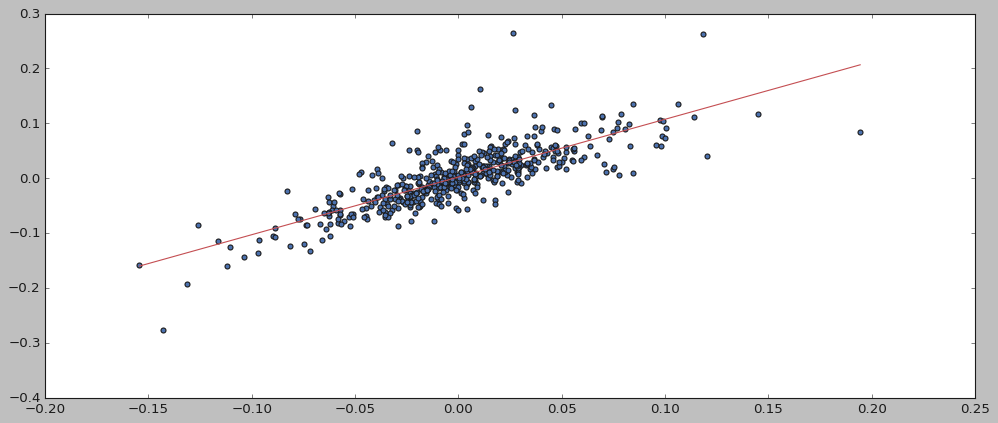

In [32]:
# Fitting a linear model
import numpy as np

btc = retdaily['BTCBUSD'].dropna()
eth = retdaily['ETHBUSD'].dropna()
(a, b)= np.polyfit(btc, eth, deg=1)
fit_equation = lambda x: a * x + b

btc_fit = np.linspace(min(btc), max(btc), 1000)
eth_fit = fit_equation(btc_fit)

plt.plot(btc_fit, eth_fit, color='r')
plt.scatter(btc, eth)
plt.show()

In [33]:
print((a,b))

(1.0520434679687485, 0.0020701366616235027)


The linear model performs not bad when return is near 0 

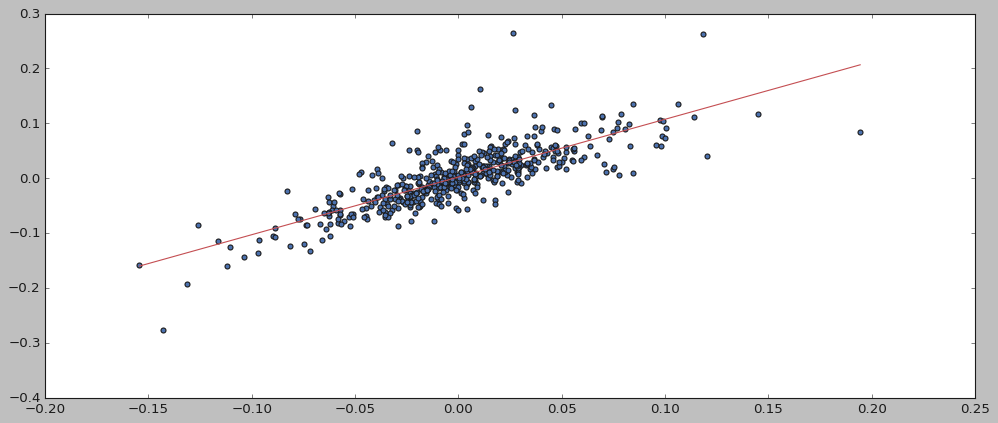

In [34]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
reg.fit(btc.values[:, np.newaxis], eth.values)

reg_pred = reg.predict(btc_fit[:, np.newaxis])

plt.scatter(btc.values, eth.values)
plt.plot(btc_fit, reg_pred, color='r')
plt.show()

In [35]:
print((reg.coef_, reg.intercept_))

(array([1.05204347]), 0.0020701366616234953)


Let's examine tokens with low correlation to BTC

In [36]:
corr_fullperiod['BTCBUSD'].nsmallest(10)

Symbol
PROMBUSD    0.155808
UNFIBUSD    0.213811
GBPBUSD     0.269923
IDEXBUSD    0.281482
DOGEBUSD    0.304221
PSGBUSD     0.314262
EURBUSD     0.320920
AUDBUSD     0.321782
GHSTBUSD    0.329253
DNTBUSD     0.373399
Name: BTCBUSD, dtype: float64

<AxesSubplot:xlabel='Time'>

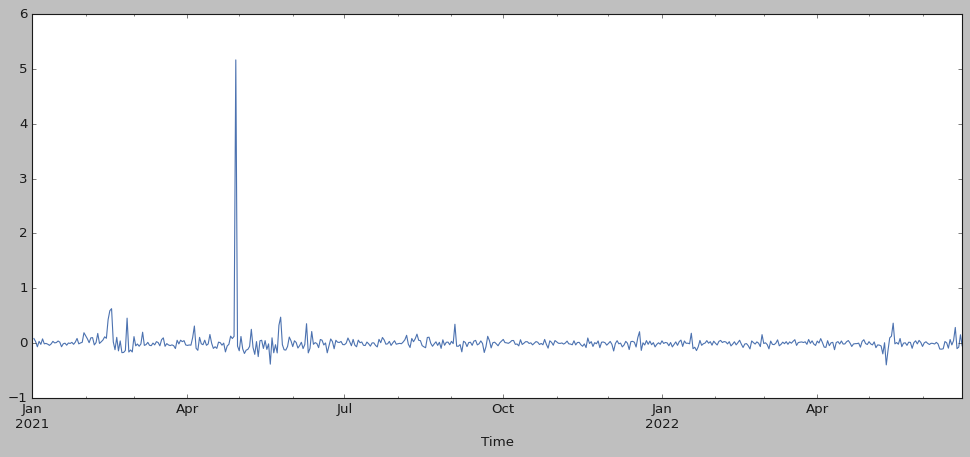

In [37]:
retdaily['PROMBUSD'].plot()

In [38]:
# Check the big spike
retdaily['PROMBUSD'].loc['2021-04-25':'2021-05-05']

Time
2021-04-25   -0.020469
2021-04-26    0.128070
2021-04-27    0.084390
2021-04-28    0.124176
2021-04-29    5.163156
2021-04-30   -0.053595
2021-05-01   -0.139266
2021-05-02    0.121124
2021-05-03   -0.104075
2021-05-04   -0.188680
2021-05-05   -0.127954
Name: PROMBUSD, dtype: float64

In [39]:
retdaily['PROMBUSD'].nlargest(10)

Time
2021-04-29    5.163156
2021-02-16    0.628626
2021-02-15    0.591093
2021-05-25    0.473664
2021-02-25    0.455590
2021-02-14    0.428623
2022-05-15    0.364162
2021-06-09    0.354264
2021-09-03    0.344289
2021-05-24    0.326929
Name: PROMBUSD, dtype: float64

The reason looks from a KOL expressing his idea about this token, that made the price raise abruptly.

<AxesSubplot:xlabel='Time'>

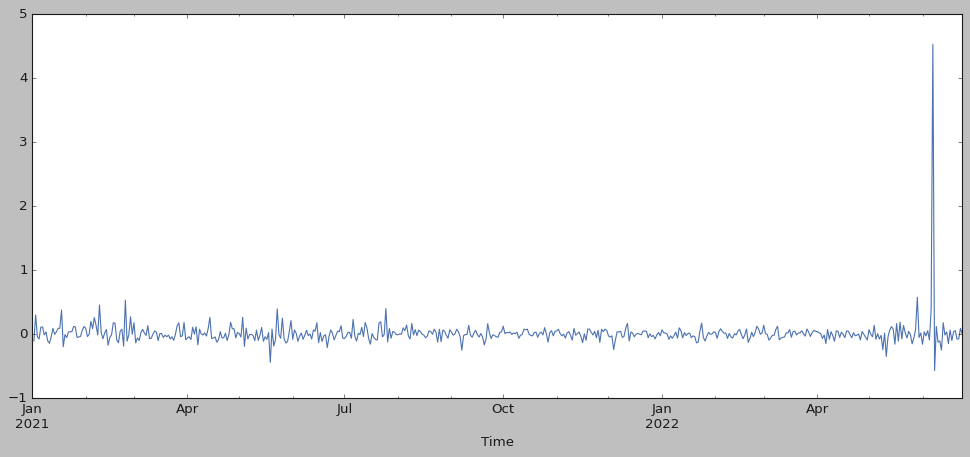

In [ ]:
retdaily['UNFIBUSD'].plot()

The pattern looks similar to PROM token.

Check 5 tokens in a row

In [41]:
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

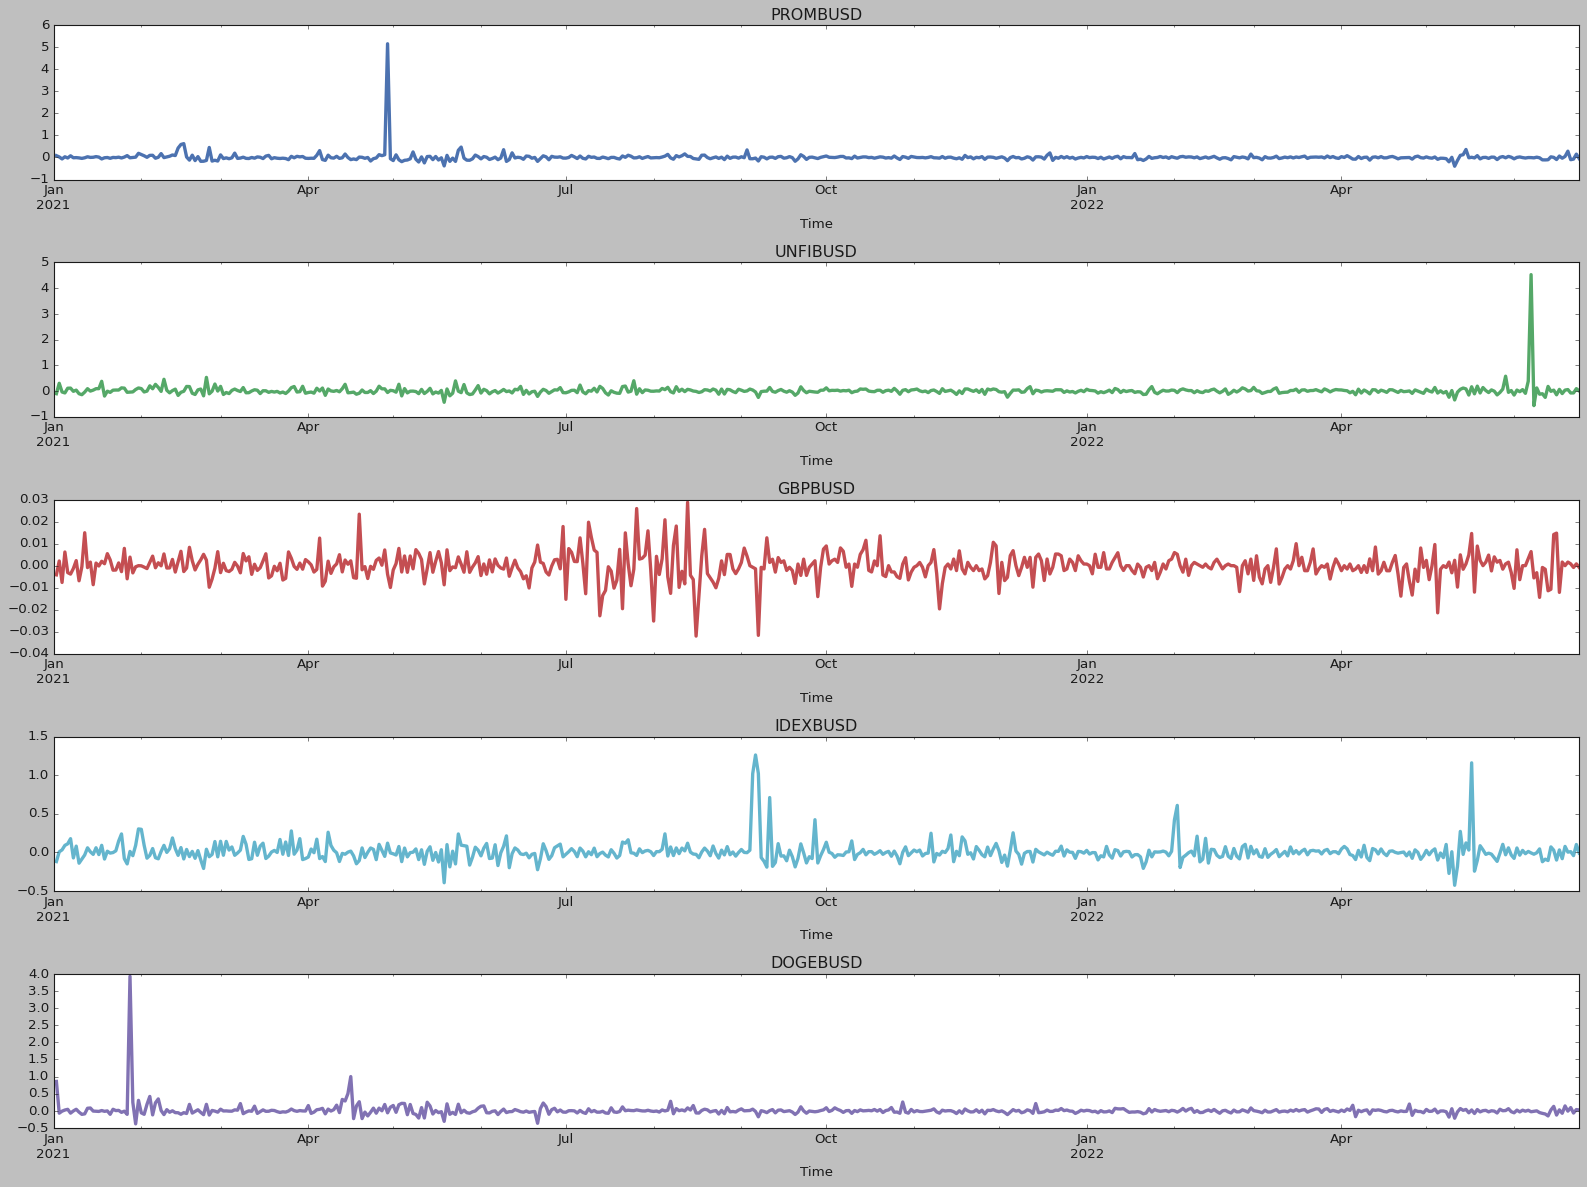

In [42]:
fig, axs = plt.subplots(5,1, figsize=(20,15))
for i, symbol in enumerate(corr_fullperiod['BTCBUSD'].nsmallest(5).index):
    retdaily[symbol].plot(title=symbol, lw=3, color=color_pal[i], ax=axs[i])

plt.tight_layout()
plt.show()

It seems that the dramatic spikes are more possible to occur when the assets are low correlated to BTC token.

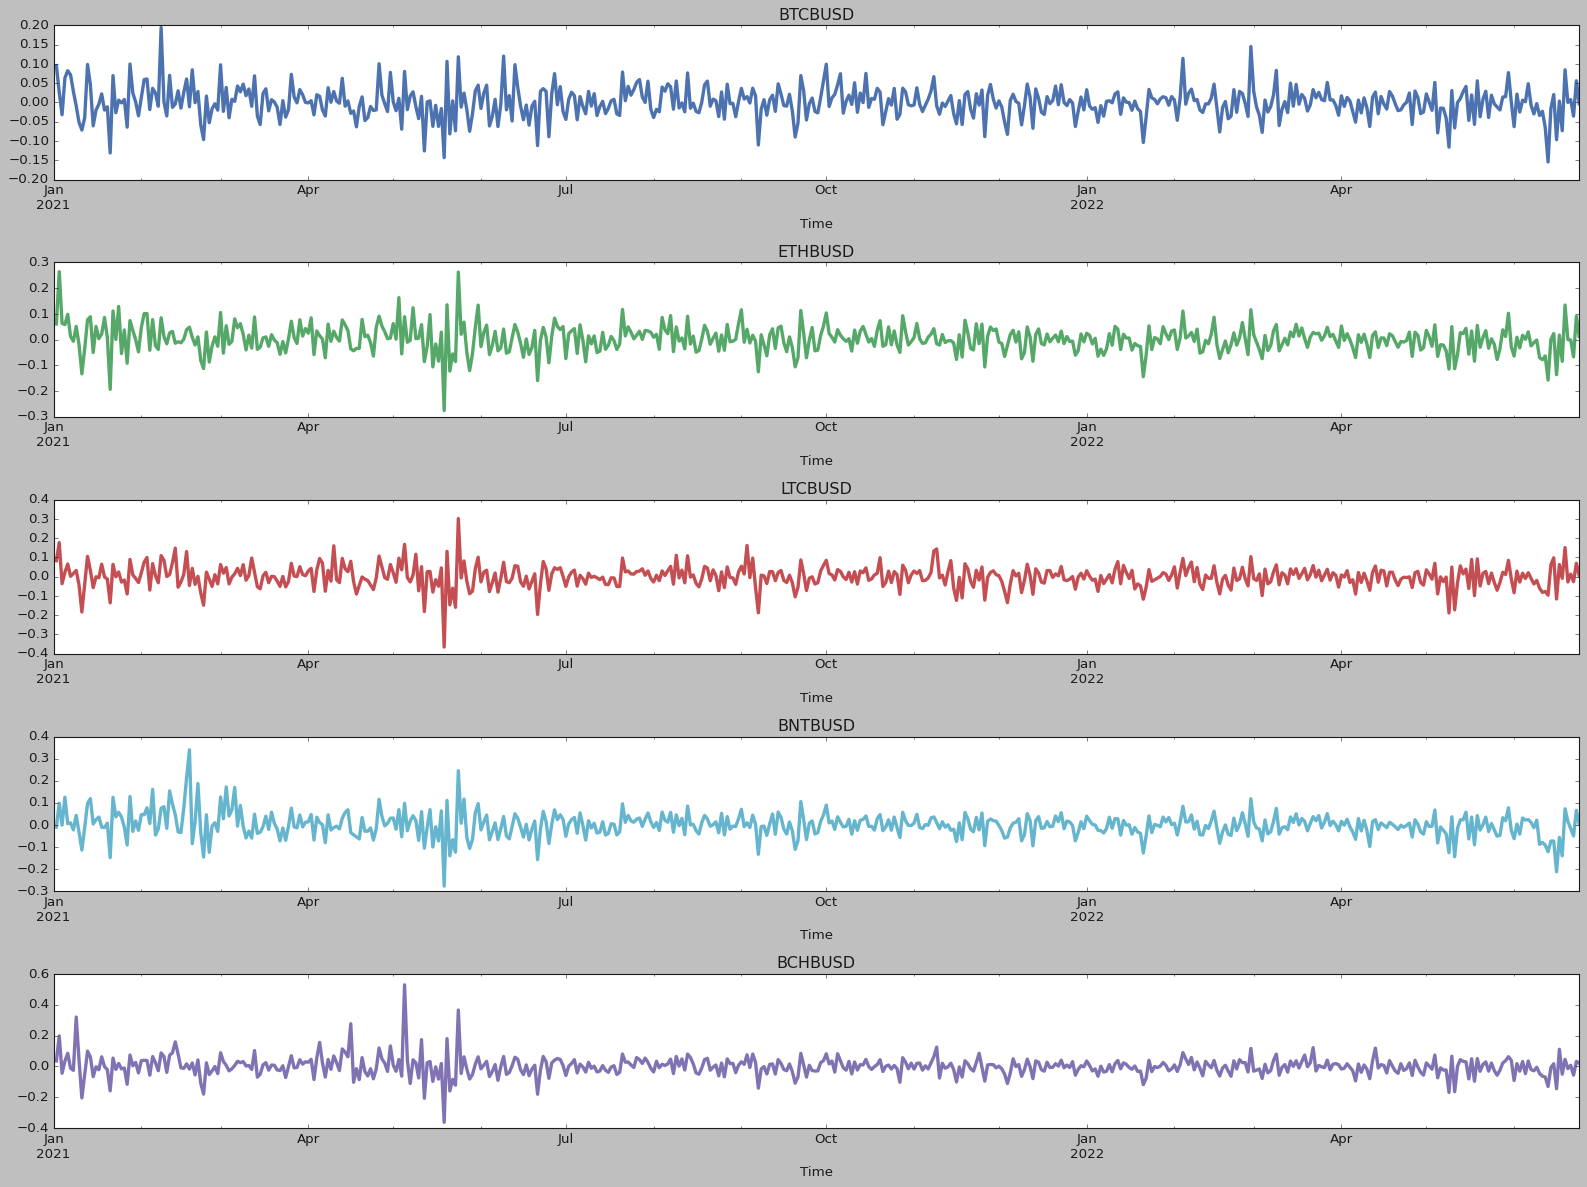

In [43]:
fig, axs = plt.subplots(5,1, figsize=(20,15))
for i, symbol in enumerate(corr_fullperiod['BTCBUSD'].nlargest(5).index):
    retdaily[symbol].plot(title=symbol, lw=3, color=color_pal[i], ax=axs[i])

plt.tight_layout()
plt.show()

It's rather less surprises for assets with high correlation to BTC in comparison with the low ones.

Are there some relations between price and daily return?

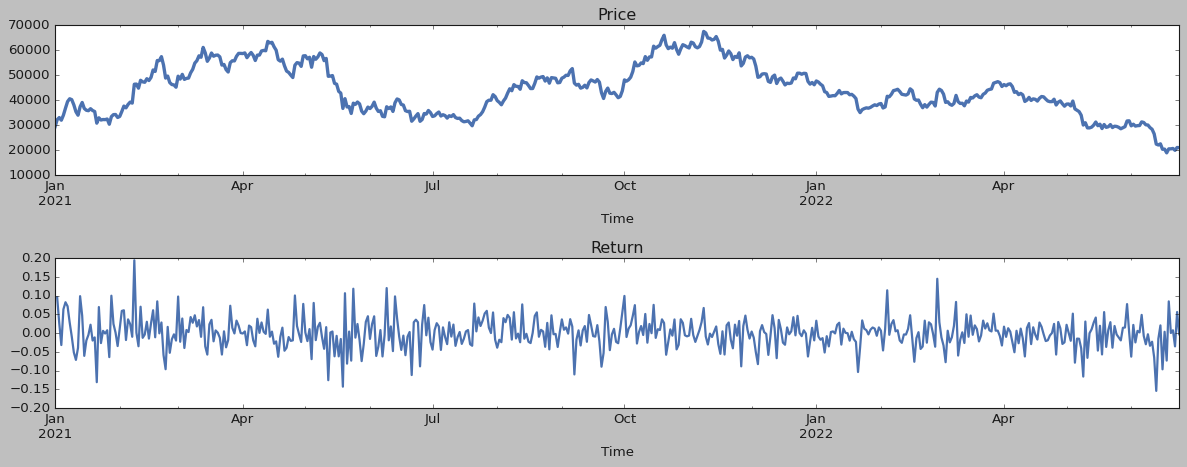

In [44]:
fig, axs = plt.subplots(2,1)

df_clean['BTCBUSD'].plot(title='Price', lw=3, ax=axs[0])
retdaily['BTCBUSD'].plot(title='Return', lw=2, ax=axs[1])
plt.tight_layout()

What about the asset with low correlation to BTC?

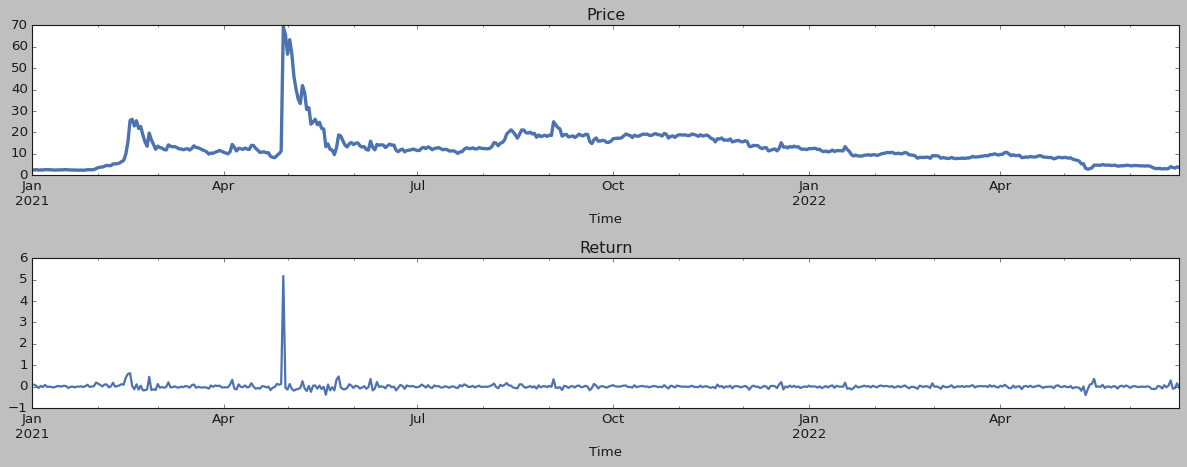

In [45]:
fig, axs = plt.subplots(2,1)

df_clean['PROMBUSD'].plot(title='Price', lw=3, ax=axs[0])
retdaily['PROMBUSD'].plot(title='Return', lw=2, ax=axs[1])
plt.tight_layout()

The price flctuates more when the daily return varies frequently

<AxesSubplot:ylabel='Frequency'>

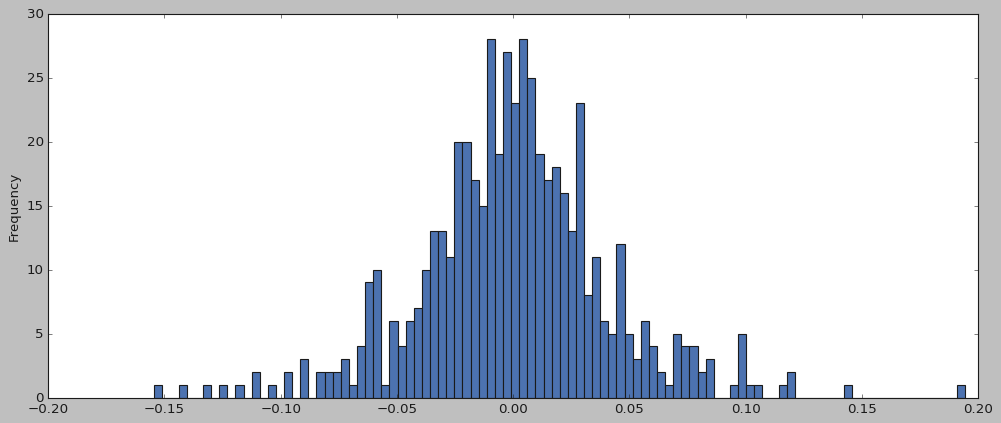

In [58]:
# what's the return distribution of BTC?

retdaily['BTCBUSD'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

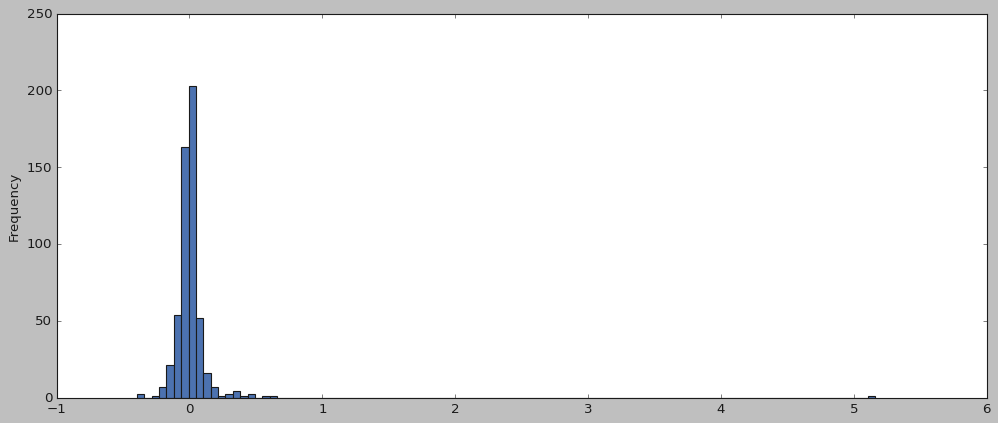

In [59]:
retdaily['PROMBUSD'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

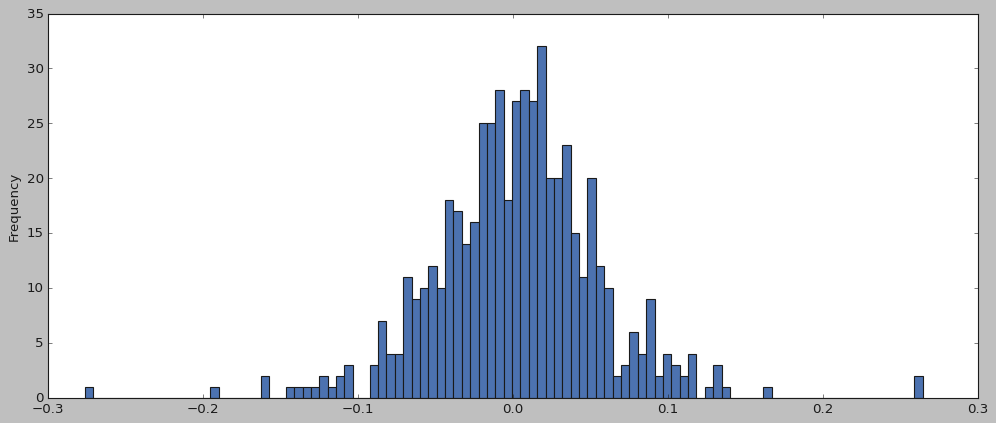

In [60]:
retdaily['ETHBUSD'].plot(kind='hist', bins=100)

# Summary
- Set up criteria for data preprocessing 
- Calculated a corrleation map for tokens
- A linear regression model worked well on the daily return for a pair of highly correlated tokens. This may provide a signal for trading.
- The price of tokens with low correlation to BTC may change dramatically
- The return ditribution of tokens look like T distribution.

# Guess
- Is it possible to guess the price movement from daily return?